<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Trainining Series on Software Engineering For Data Science  
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

# Notebook 7: Data Processing & Cleaning for Data Science: Exploratory Data Analysis and Visualization– Going Deeper
The purpose of this [Jupyter Notebook] is to getting you go deeper on Data Processing & Cleaning for Data
Science. It provides a set of practical Training challenges that allow grasping the different concepts presented in  lecture 7.

## EDA

### Challenge 1:  iTunes dataset
Using the iTunes dataset existed in the /data folder of this notebook, you are asked to  proceed with the  exploratory data analysis and visulaization techniques seen in lecture 7 to provide a clean dataset as well as to report a small summary of your EDA results to your team.

The EDA should be done using a visualization technique rather than using the basic EDA procedures seen in Lecture 5.
See Test from Slide 4 to 16.

Report the possible high correlation found from your visualization EDA.


#### Reading CSV

In [4]:
import pandas as pd # type: ignore

df = pd.read_csv('data/itunes_data.csv')
df.head()


,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,For Those About To Rock (We Salute You),"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99,Rock,For Those About To Rock We Salute You,AC/DC
1,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99,Rock,For Those About To Rock We Salute You,AC/DC
2,Let's Get It Up,"Angus Young, Malcolm Young, Brian Johnson",233926,7636561,0.99,Rock,For Those About To Rock We Salute You,AC/DC
3,Inject The Venom,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99,Rock,For Those About To Rock We Salute You,AC/DC
4,Snowballed,"Angus Young, Malcolm Young, Brian Johnson",203102,6599424,0.99,Rock,For Those About To Rock We Salute You,AC/DC


#### Dimensional Analysis (DA)
Technique of analyzing the
relationships between different
physical quantities by identifying
their base quantities (such as
**length**, **mass**, **time**, …) and
common **units of measure**.

In [5]:
df['Minutes'] = df['Milliseconds'] / (1000 * 60)
df['MBytes'] = df['Bytes'] / 1000000
df.drop(['Milliseconds', 'Bytes'], axis=1, inplace=True)
df.head()

,Track,Composer,UnitPrice,Genre,Album,Artist,Minutes,MBytes
0,For Those About To Rock (We Salute You),"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC,5.728650,11.170334
1,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC,3.427700,6.713451
2,Let's Get It Up,"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC,3.898767,7.636561
3,Inject The Venom,"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC,3.513900,6.852860
4,Snowballed,"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC,3.385033,6.599424


#### Making Boxplots and Letter-Value plots
Helps to quickly see information  about the distribution of a dataset  and enables comparing subsets of  data. <br/>
Data are plotted according to the IQR formula <br/>
Instead of showing outliers outside 
the ****IQR**** ➡️ Plotting outliers with a 
letter-value plot results in 5 to 8 
outliers on the upper and lower 
extremes.

Text(0.5, 1.0, 'Logarithmic Scale')

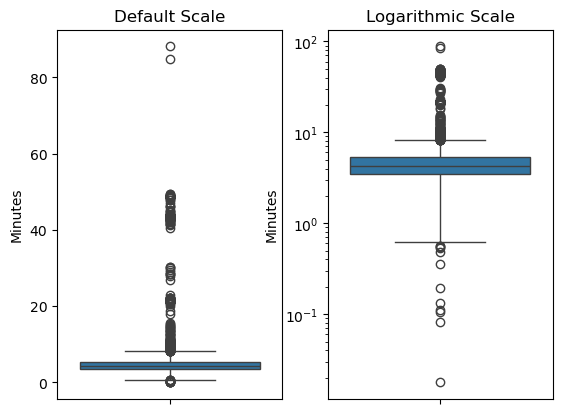

In [6]:
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

fig, axes = plt.subplots(nrows=1, ncols=2)
sns.boxplot(y=df['Minutes'],ax=axes[0])
sns.boxplot(y=df['Minutes'],ax=axes[1])
plt.yscale('log')

axes[0].set_title("Default Scale")
axes[1].set_title("Logarithmic Scale")



#### Making histograms and violin plots
* Another way to see the distribution of data is using **histograms** and ***Kernel Density Estimation (KDE)***
* **KDE** fits a line to the distribution  of data and produces a smoothed  histogram
* The resulting plot shows bars that  represent the density of the data – bigger bars mean more points. The  line is the KDE fit to the data


<Axes: xlabel='Minutes', ylabel='Count'>

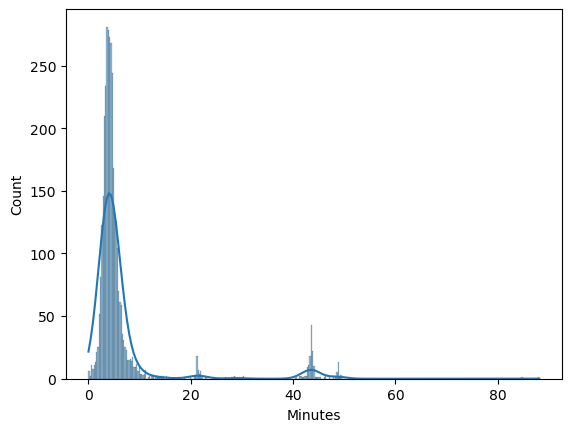

In [7]:
sns.histplot(x=df['Minutes'], kde=True)

* A **violin plot** is similar, but shows the **KDE** and a boxplot.
* The KDE is the main feature of the plot, and it is mirrored on the x axis.
* A small boxplot in the middle of the mirrored KDE distribution is also shown.

<Axes: xlabel='Minutes'>

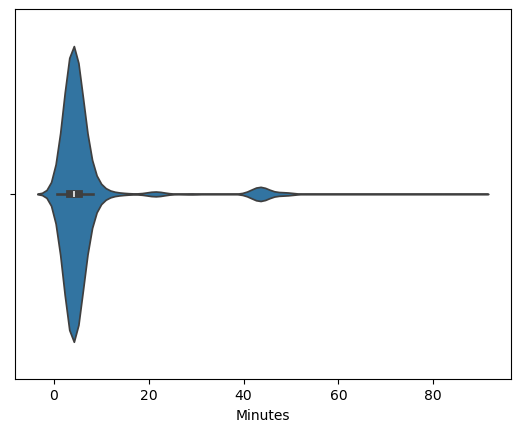

In [8]:
sns.violinplot(data=df, x='Minutes')

<Axes: xlabel='Minutes', ylabel='Genre'>

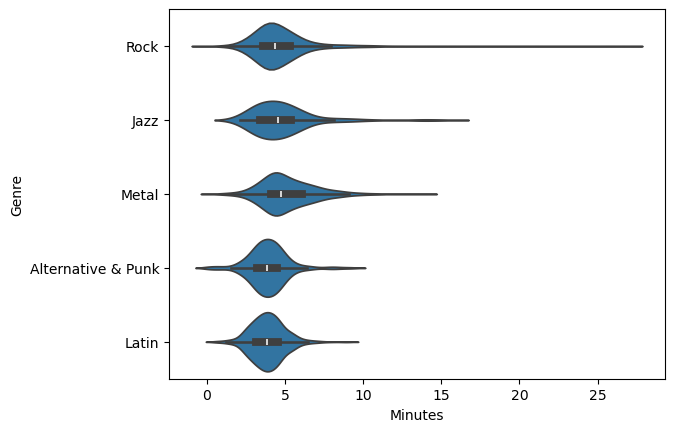

In [9]:
top_5_genres = df['Genre'].value_counts().index[:5]
top_5_data = data=df[df['Genre'].isin(top_5_genres)]
sns.violinplot(data=top_5_data, x='Minutes', y='Genre')

#### Making Scatter Plots
Scatter plots ➡️ Essential EDA plot for **continuous**, **numeric** data.
* <b>Continuous data</b> : data that can take any **value** between two bounds, such as length, or temperature.

<Axes: xlabel='Minutes', ylabel='MBytes'>

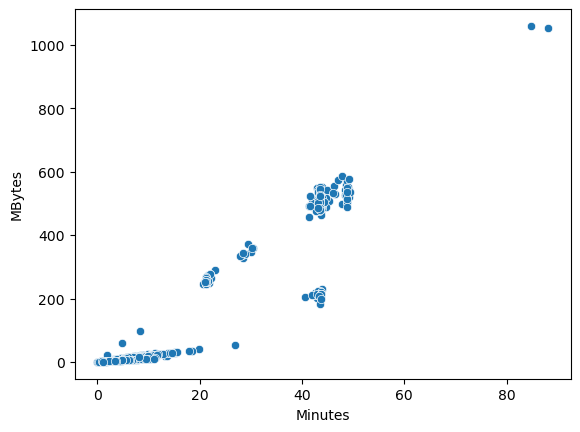

In [10]:
sns.scatterplot(data=df, x='Minutes', y='MBytes' )

<Axes: xlabel='Minutes', ylabel='MBytes'>

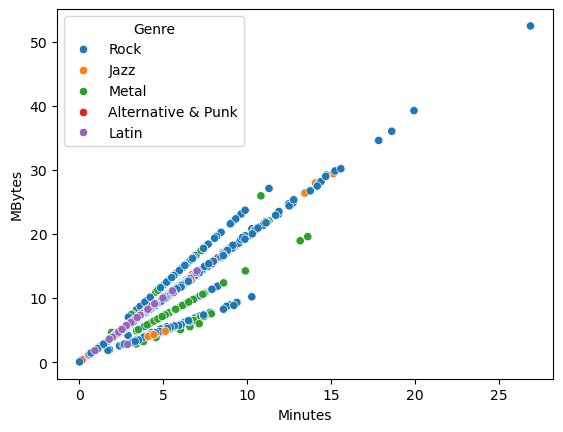

In [11]:
sns.scatterplot(data=top_5_data, x='Minutes', y='MBytes', hue='Genre')

#### Making Correlograms & Examining Correlations
A **Correlogram** ➡️ allows to analyze the relationship between each pair of numeric variables of a dataset.

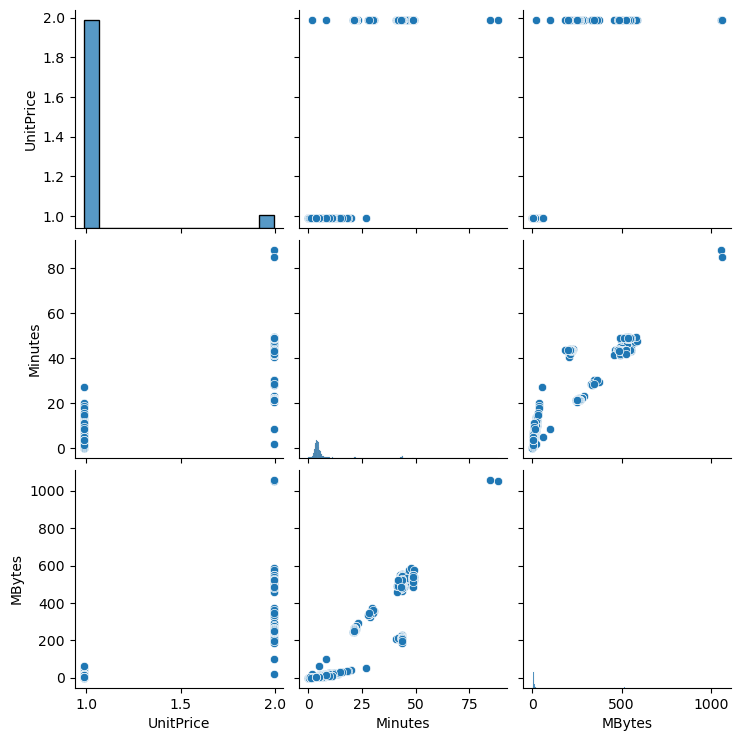

In [12]:
sns.pairplot(data=df)

We often want to see how strongly correlated different numeric columns are.

<Axes: >

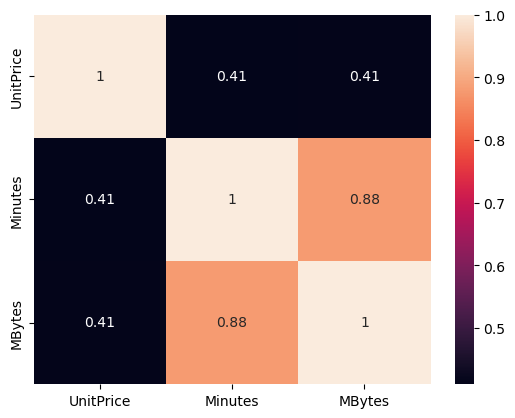

In [13]:
sns.heatmap(df.select_dtypes(include=[float, int]).corr(method='spearman'), annot=True)

#### Making Missing Value Plots

<Axes: >

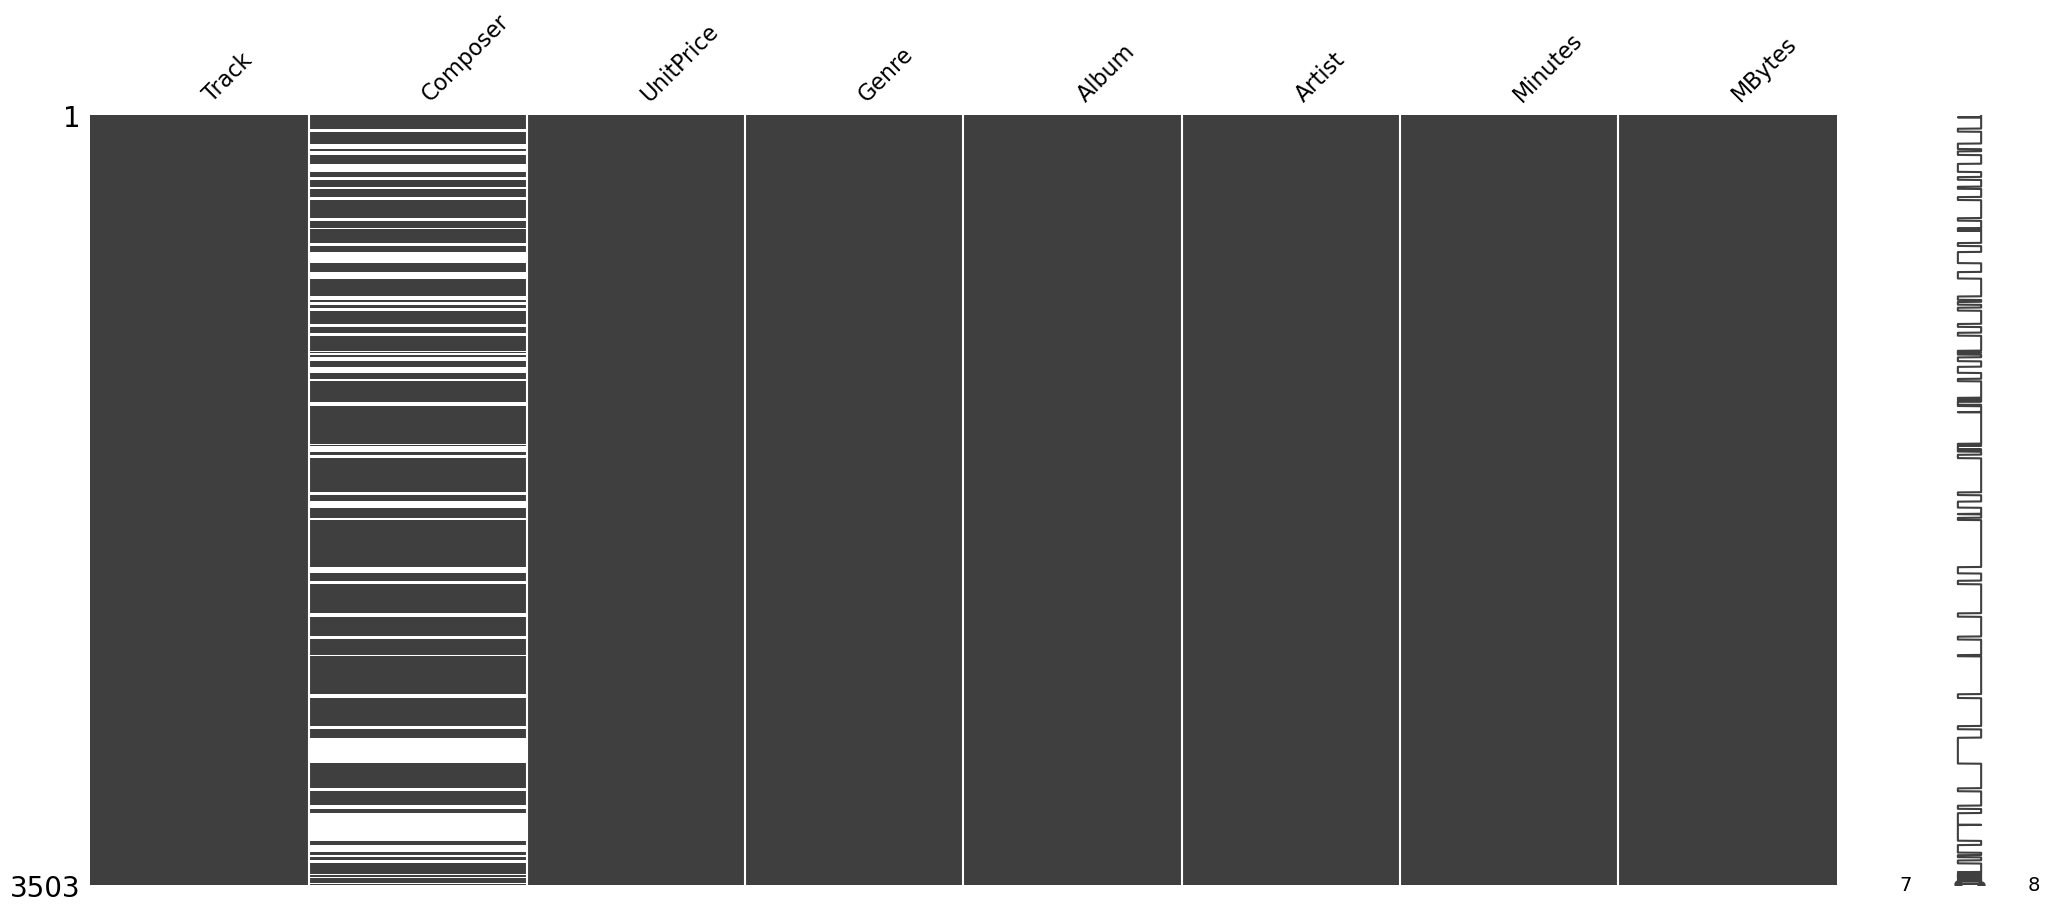

In [14]:
import missingno as msno # type: ignore
msno.matrix(df)

In [15]:
# from ydata_profiling import ProfileReport # type: ignore

# report = ProfileReport(df, title="Music Dataset Profiling Report")
# report

In [16]:
import plotly.express as px
px.histogram(df, x='Minutes')

### Challenge 2: hous_pricing dataset 

Do the EDA and visualization procedures to explore the data/hous_pricing dataset.

Report the possible high correlation found from your visualization EDA.


In [17]:
import pandas as pd # type: ignore

df2 = pd.read_csv('data/house_pricing.csv')
df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [18]:
from pandas_profiling import ProfileReport
report = ProfileReport(df2)
report #or

ModuleNotFoundError: No module named 'imghdr'

In [19]:
df2_corr = df2.select_dtypes(include=[float, int]).corr(method='spearman')
df2_corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.00,0.34,0.49,0.63,0.08,0.32,0.08,0.27,0.02,0.53,0.24,0.08,-0.07
bedrooms,0.34,1.00,0.54,0.65,0.24,0.22,-0.01,0.09,0.01,0.53,0.25,0.16,-0.06
bathrooms,0.49,0.54,1.00,0.75,0.09,0.54,0.05,0.17,-0.16,0.70,0.19,0.53,-0.21
sqft_living,0.63,0.65,0.75,1.00,0.33,0.40,0.07,0.25,-0.07,0.84,0.32,0.32,-0.13
sqft_lot,0.08,0.24,0.09,0.33,1.00,-0.20,0.09,0.11,0.09,0.31,0.02,-0.01,0.05
floors,0.32,0.22,0.54,0.40,-0.20,1.00,0.02,0.02,-0.30,0.60,-0.29,0.54,-0.23
waterfront,0.08,-0.01,0.05,0.07,0.09,0.02,1.00,0.27,0.00,0.05,0.05,-0.03,0.01
view,0.27,0.09,0.17,0.25,0.11,0.02,0.27,1.00,0.06,0.15,0.27,-0.08,0.03
condition,0.02,0.01,-0.16,-0.07,0.09,-0.30,0.00,0.06,1.00,-0.18,0.20,-0.43,-0.24
sqft_above,0.53,0.53,0.70,0.84,0.31,0.60,0.05,0.15,-0.18,1.00,-0.17,0.46,-0.17


In [ ]:
sns.pairplot(data=df2)